In [96]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as mtn
import os
mycolor = '#7a85c1'

In [3]:
folder = r"C:\Users\chira\Documents\All Files\PortFolio Dashboards💸\#3 FlightDashboard\Data"

In [40]:
tables = {}

for files in os.listdir(folder):
    Names = files.replace('.csv', '').replace(' ', '_')
    df = pd.read_csv(os.path.join(folder, files))
    df.columns = df.columns.str.lower()
    tables[Names] = df

In [41]:
Bookings = tables['Booking_Data']
Customers = tables['Customer_Table']
Flights = tables['Flight_Table']

# Tables Details

# Bookings - Fact Table

In [54]:
Bookings.info()

Bookings['bookingdate'] = pd.to_datetime(Bookings['bookingdate'], format = 'mixed')
Bookings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4524 entries, 0 to 4523
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   bookingid       4524 non-null   object        
 1   customerid      4524 non-null   object        
 2   flightid        4524 non-null   object        
 3   bookingdate     4524 non-null   datetime64[ns]
 4   paymentmethod   4524 non-null   object        
 5   discountused    4524 non-null   float64       
 6   finalfare       4524 non-null   float64       
 7   bookingchannel  4524 non-null   object        
 8   flight status   4524 non-null   object        
 9   class type      4524 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 353.6+ KB


,bookingdate,discountused,finalfare
count,4524,4524.000000,4524.000000
mean,2023-09-26 03:40:15.915119616,0.149344,7491.474978
min,2022-01-02 00:00:00,0.000000,2.090000
25%,2022-12-16 00:00:00,0.070000,3704.617500
50%,2023-09-26 00:00:00,0.150000,7455.825000
75%,2024-07-15 00:00:00,0.230000,11304.402500
max,2025-12-05 00:00:00,0.300000,14999.250000
std,NaN,0.087393,4331.609600


# Customers Table

In [51]:
Customers.info()
Customers.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customerid      100 non-null    object
 1   name            100 non-null    object
 2   age             100 non-null    int64 
 3   gender          100 non-null    object
 4   country         100 non-null    object
 5   city            100 non-null    object
 6   membershiptier  100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


,age
count,100.000000
mean,43.350000
std,14.904663
min,19.000000
25%,31.750000
50%,42.000000
75%,57.000000
max,69.000000


# Flights Table - Dim Table

In [57]:
Flights['departuredate'] = pd.to_datetime(Flights['departuredate'], format = 'mixed')
Flights['arrivaldate'] = pd.to_datetime(Flights['arrivaldate'], format = 'mixed')

Flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   flightid         200 non-null    object        
 1   airline          200 non-null    object        
 2   sourcecity       200 non-null    object        
 3   destinationcity  200 non-null    object        
 4   departuredate    200 non-null    datetime64[ns]
 5   arrivaldate      200 non-null    datetime64[ns]
 6   durationhrs      200 non-null    float64       
 7   distancekm       200 non-null    float64       
 8   flightclass      200 non-null    object        
 9   ticketprice      200 non-null    float64       
 10  bookingstatus    200 non-null    object        
dtypes: datetime64[ns](2), float64(3), object(6)
memory usage: 17.3+ KB


### 1.	Distribution of ticket prices across different flight classes.

In [64]:
Distribution = round(Flights.groupby('flightclass')['ticketprice'].mean().reset_index(),1)
Distribution

,flightclass,ticketprice
0,Business,9545.2
1,Economy,9265.6


### 2.	Trend analysis of bookings over time (monthly/quarterly).

In [93]:
Bookings['Month'] = Bookings['bookingdate'].dt.month_name()
Bookings['Sort'] = Bookings['bookingdate'].dt.month
Bookings['Quarter'] = Bookings['bookingdate'].dt.quarter
Bookings['Year'] = Bookings['bookingdate'].dt.year

In [98]:
MonthDis = Bookings.groupby(['Month', 'Sort']).size().reset_index(name = 'bookings').sort_values(by = 'Sort')

In [99]:
MonthDis

,Month,Sort,bookings
4,January,1,469
3,February,2,322
7,March,3,432
0,April,4,464
8,May,5,381
6,June,6,337
5,July,7,401
1,August,8,363
11,September,9,371
10,October,10,317


## Month Analysis

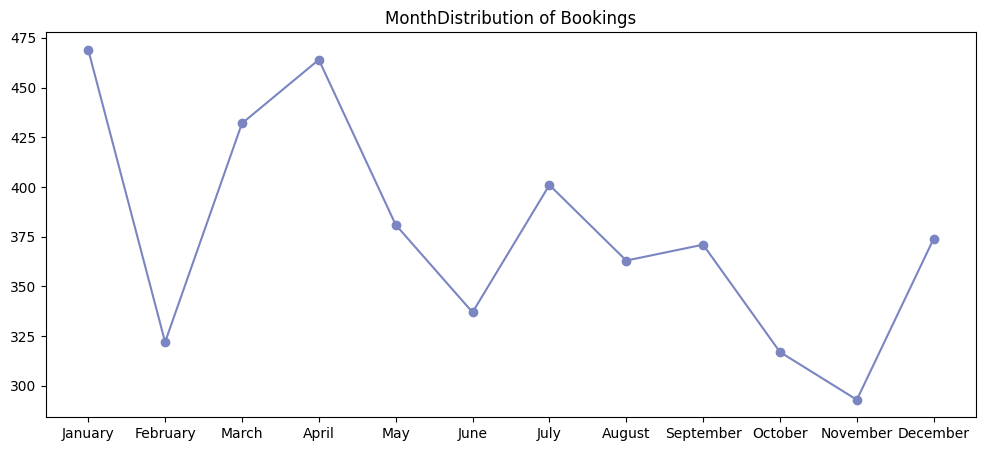

In [100]:
mtn.figure(figsize = (12,5))
mtn.plot(MonthDis['Month'], MonthDis['bookings'], color = mycolor, marker = 'o')
mtn.title('MonthDistribution of Bookings')
mtn.show()

## Quarter Analysis

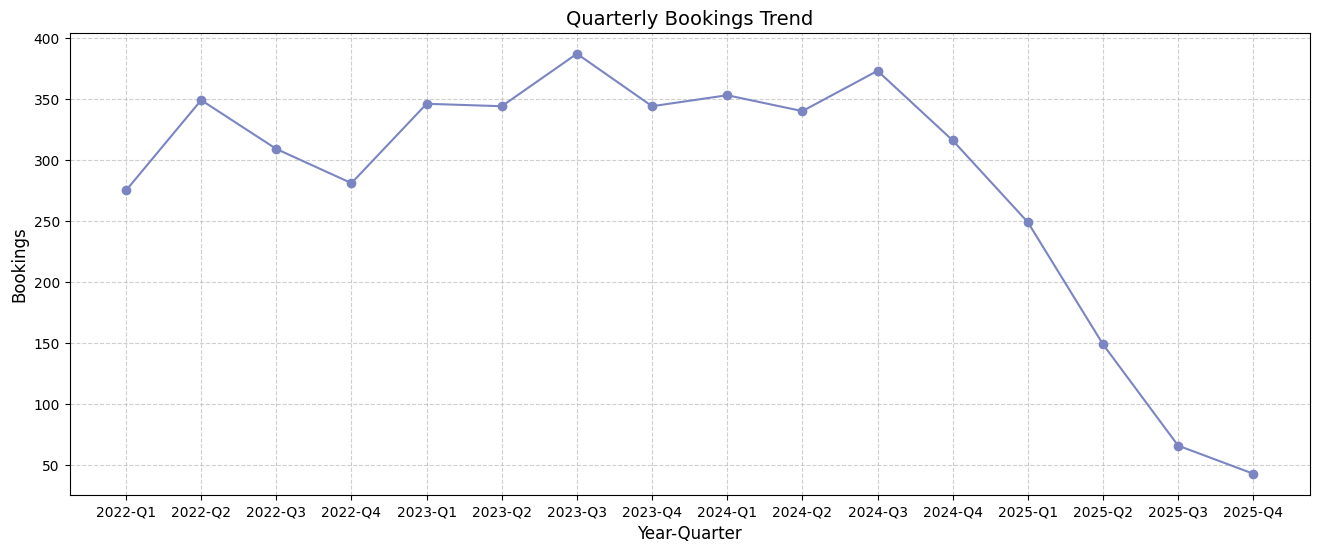

In [116]:
QuarterDis['YearQuarter'] = QuarterDis['Year'].astype(str) + '-Q' + QuarterDis['Quarter'].astype(str)

# Plot

mtn.figure(figsize=(16,6))
mtn.plot(QuarterDis['YearQuarter'], QuarterDis['bookings'], marker='o', color= mycolor)

mtn.title("Quarterly Bookings Trend", fontsize=14)
mtn.xlabel("Year-Quarter", fontsize=12)
mtn.ylabel("Bookings", fontsize=12)
mtn.grid(True, linestyle='--', alpha=0.6)
mtn.show()

### 3.	Cancellation vs. on-time vs. delayed percentages across airlines.

In [134]:
Flights['Booked'] = np.where(Flights['bookingstatus'] == 'Booked', 1, 0)
Flights['Cancelled'] = np.where(Flights['bookingstatus'] == 'Canceled', 1, 0)


In [150]:
Matrix = Flights.groupby('airline').agg(
    TotalBooked = ('Booked', 'sum'),
    TotalCancelled = ('Cancelled', 'sum'),
    TotalBookings = ('bookingstatus', 'count')
).reset_index()

In [155]:
Matrix['Booked%'] = round((Matrix['TotalBooked'] * 100.0/Matrix['TotalBookings']),1)
Matrix['Cancelled%'] = round((Matrix['TotalCancelled'] * 100.0/Matrix['TotalBookings']),1)

In [157]:
Matrix[['airline', 'Booked%', 'Cancelled%']]

,airline,Booked%,Cancelled%
0,Air India,45.5,54.5
1,AirAsia India,62.9,37.1
2,GoAir,48.7,51.3
3,IndiGo,27.6,72.4
4,SpiceJet,48.5,51.5
5,Vistara,54.8,45.2


### 4.	Heatmap showing correlation between Distance, Duration, and Ticket Price.

In [162]:
matrix = Flights[['durationhrs', 'distancekm', 'ticketprice']].corr()

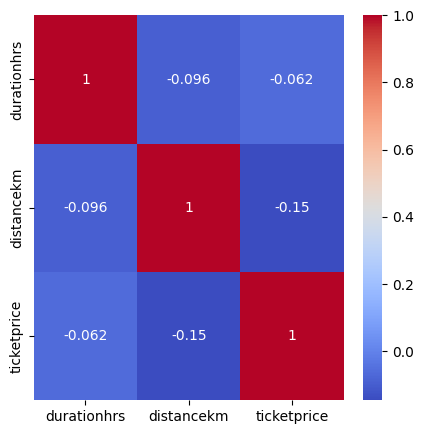

In [164]:
mtn.figure(figsize = (5,5))
sea.heatmap(matrix, annot = True, cmap = 'coolwarm')
mtn.show()

### 5.	Customer age distribution across different Membership Tiers.

,customerid,name,age,gender,country,city,membershiptier
0,CUST1000,Allison Hill,56,Male,India,Hyderabad,Platinum
1,CUST1001,Noah Rhodes,69,Male,India,Lucknow,Platinum
2,CUST1002,Angie Henderson,46,Male,India,Ahmedabad,Platinum
3,CUST1003,Daniel Wagner,32,Male,India,Jaipur,Gold
4,CUST1004,Cristian Santos,60,Male,India,Ahmedabad,Silver
...,...,...,...,...,...,...,...
95,CUST1095,Anna Henderson,42,Female,India,Chennai,Gold
96,CUST1096,Aaron Wise,62,Female,India,Chennai,Silver
97,CUST1097,Deborah Figueroa,58,Female,India,Ahmedabad,Silver
98,CUST1098,Jessica Smith,46,Female,India,Jaipur,Silver


In [171]:
bins = [0, 25, 35, 45, 60, 100]   # age ranges
labels = ['18-25', '26-35', '36-45', '46-60', '60+']

Customers['AgeGroup'] = pd.cut(Customers['age'], bins=bins, labels=labels, right=True)

Customers.groupby(['AgeGroup', 'membershiptier'], observed = True).size().reset_index(name = 'Total').sort_values(by = 'Total', ascending = False)

,AgeGroup,membershiptier,Total
11,46-60,Silver,12
12,60+,Gold,10
6,36-45,Gold,10
3,26-35,Gold,9
7,36-45,Platinum,8
10,46-60,Platinum,8
1,18-25,Platinum,7
5,26-35,Silver,7
2,18-25,Silver,6
14,60+,Silver,5


### 6.	Revenue contribution breakdown by payment methods.

In [174]:
Bookings.groupby('paymentmethod')['finalfare'].sum().reset_index(name = 'Revenue')

,paymentmethod,Revenue
0,Credit Card,8295520.87
1,Debit Card,8298123.44
2,Net Banking,8166597.43
3,UPI,9131191.06


### 7.	Average discount usage rate across booking channels.

In [182]:
round(Bookings.groupby('bookingchannel')['discountused'].mean().reset_index(),4)

,bookingchannel,discountused
0,Call Centre,0.1465
1,Mobile App,0.1505
2,Travel Agent,0.1499
3,Website,0.1503


### 8.	Compare final fares between Business, Economy, and First Class across airlines.

In [199]:
Class = round((Bookings.groupby('class type')['finalfare'].mean().reset_index().sort_values(by = 'finalfare', ascending = False)),1)

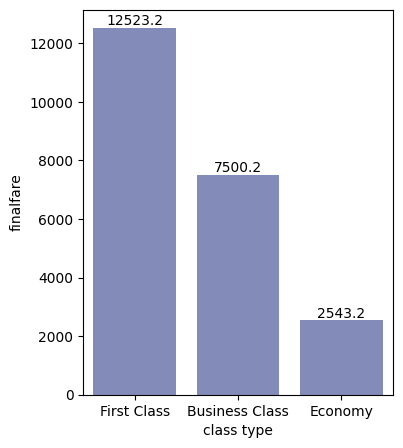

In [201]:
mtn.figure(figsize = (4,5))
ax = sea.barplot(x = 'class type', y = 'finalfare', data = Class, color = mycolor)
ax.bar_label(ax.containers[0])
mtn.show()

### 9.	Identify top 5 cities (customers’ city) contributing maximum revenue.

In [219]:
CustomersRevenue = Bookings.groupby('customerid')['finalfare'].sum().reset_index()

CityTable = Customers.merge(CustomersRevenue, on = 'customerid', how = 'inner').groupby('city')['finalfare'].sum().reset_index().sort_values(by = 'finalfare', ascending = False).head()

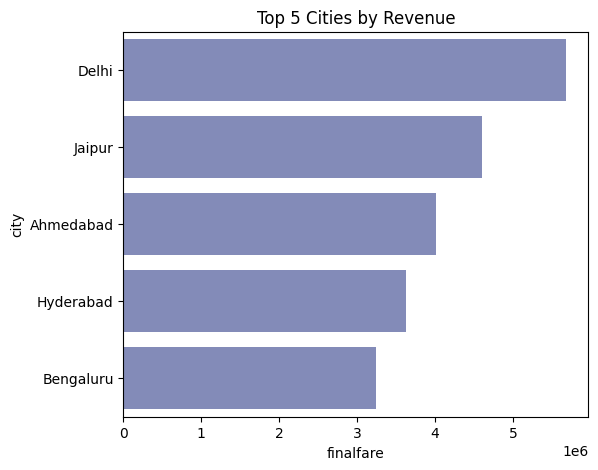

In [224]:
mtn.figure(figsize = (6,5))
ax = sea.barplot(y = 'city', x = 'finalfare', data = CityTable, color = mycolor)
mtn.title('Top 5 Cities by Revenue')
mtn.show()

### 10.	Gender-wise spending patterns across flight classes.

In [231]:
Combined = Bookings.merge(Customers, on = 'customerid', how = 'inner')

In [238]:
Table = Combined.groupby(['gender', 'city'])['finalfare'].sum().reset_index()

In [241]:
Table.loc[Table.groupby('gender')['finalfare'].idxmax()]

,gender,city,finalfare
5,Female,Jaipur,2109076.97
13,Male,Delhi,3710433.66


### 11. Top 5 Routes showing the highest revenue in 2025

In [248]:
Flights['Route'] = Flights['sourcecity'] + ' => ' + Flights['destinationcity']

In [253]:
Combined = Bookings.groupby('flightid')['finalfare'].sum().reset_index().merge(Flights, on = 'flightid', how = 'inner')

In [259]:
Distribution = Combined.groupby('Route')['finalfare'].sum().reset_index().sort_values(by = 'finalfare', ascending = False).head()

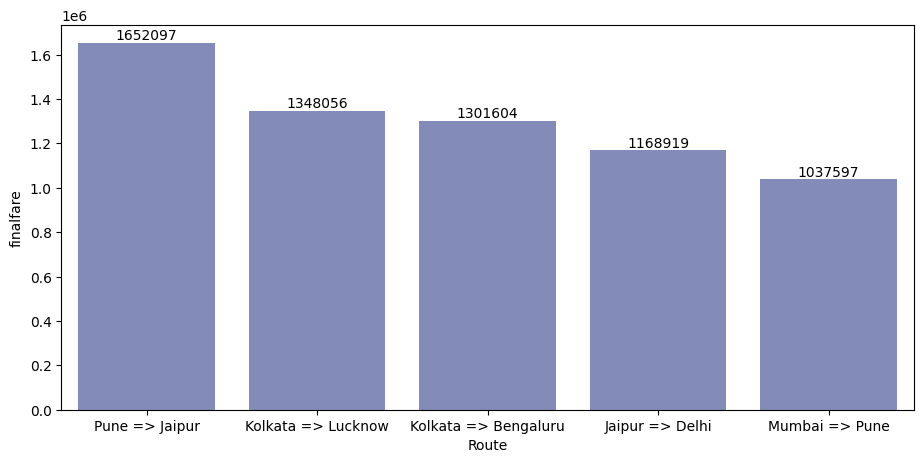

In [267]:
mtn.figure(figsize = (11,5))
ax = sea.barplot(x = 'Route', y = 'finalfare', data = Distribution, color = mycolor)
ax.bar_label(ax.containers[0], fmt = '%.0f')
mtn.show()

### 12.	BookingChannel performance comparison: average delays and cancellations.

In [283]:
Bookings['Cancelled'] = np.where(Bookings['flight status'] == 'Cancel', 1,0)
Bookings['Delayed'] = np.where(Bookings['flight status'] == 'Delayed', 1,0)

In [289]:
matrix = Bookings.groupby('bookingchannel').agg(
    Cancelled = ('Cancelled', 'sum'),
    Delayed = ('Delayed', 'sum'),
    Total = ('bookingid', 'count')
).reset_index()

In [293]:
matrix['Cancelled%'] = round(matrix['Cancelled'] *100.0/matrix['Total'],1)
matrix['Delayed%'] = round(matrix['Delayed'] * 100.0/matrix['Total'],1)

In [299]:
matrix[['bookingchannel', 'Cancelled%', 'Delayed%']]

,bookingchannel,Cancelled%,Delayed%
0,Call Centre,35.1,33.8
1,Mobile App,35.5,30.3
2,Travel Agent,35.2,32.9
3,Website,32.2,33.2
